# 2018016037 물리학과 조은강
기말대체과제 1 와인분류

와인의 데이터를 그룹화 하기 위하여 클러스터링을 사용하는데 가장 직관적인 K-means clustering을 사용하였다. 데이터를 2차원으로 배치하고 클러스터라고 하는 데이터 묶음을 만들어 데이터와 클러스터들의 데이터평균(중심)간의 거리를 계산하여 가장 가까운 클러스터에 데이터를 배정하고 데이터가 배정된만큼 변한 클러스터의 중심을 다시 평균으로 이동하여 클러스터가 변하지 않을때까지 반복시키는 방법을 사용하였는데. 13가지의 서로다른 데이터를 x,y평면에 나타내기 위하여 lcohol 데이터를 x축으로 두고 매 시료의 13가지 특징데이터에 각각 평균값을 나눈후 모두곱해진값을 y축으로 두어 분류를 해보았습니다. 클러스터링 결과 군집을 보기좋게 나누는데 성공했지만 실제wine['target'] 값에는 일치하지 못하는 결과나 나왔다. 이는 13개의 데이터를 2차원으로 압축하는 과정에서 몇몇 솟구치듯 군집 밖으로 나가는 데이터가 생겼고 그것을 반영하기 위해 클러스터의 중심이 심각하게 움직여서 그렇게 된듯합니다. 3차원. 4차원으로 행렬의 크기를 늘리면 더 정확하게 분류가 가능할 것 같습니다. 

In [264]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [261]:
X=wine['data']
y=wine['target']

In [262]:
m=X.shape[0] 
n=X.shape[1]
m,n

(178, 13)

In [362]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

import pandas as pd

Xo = pd.DataFrame(X)


In [386]:
Xa=np.array(Xo)
sum_list = {} #합들을 담을 dictionary
n=178
for i in range(13):

    columnsum = 0 #열의 합
    for j in range(n):
 
        columnsum += Xa[j][i]

    sum_list[str(i)]=columnsum/178 
print(sum_list)

{'0': 13.000617977528083, '1': 2.336348314606741, '2': 2.3665168539325854, '3': 19.49494382022472, '4': 99.74157303370787, '5': 2.295112359550562, '6': 2.0292696629213474, '7': 0.36185393258426973, '8': 1.5908988764044953, '9': 5.058089882022473, '10': 0.9574494382022468, '11': 2.6116853932584254, '12': 746.8932584269663}


In [387]:
Multi= sum_list['0']*sum_list['1']*sum_list['2']*sum_list['3']*sum_list['4']*sum_list['5']*sum_list['6']*sum_list['7']*sum_list['8']*sum_list['9']*sum_list['10']*sum_list['11']*sum_list['12']
Multi

3540061175.1296134

In [388]:
def XX(n):
    x=np.prod(Xa[n])
    return x/ #n번째 와인 13항목의곱/13항목의평균곱

In [389]:
XX(177),XX(0)

(0.6246231161033732, 4.451905385875247)

In [390]:

n=177
f=np . zeros(n+1,float)
while(n>-1):
    
    f[n] = XX(n)
    n=n-1

f

array([4.45190539e+00, 6.35747794e-01, 7.39599304e+00, 9.04557341e+00,
       3.56351452e+00, 6.40348606e+00, 2.41568895e+00, 2.97865616e+00,
       1.62240572e+00, 1.94438646e+00, 6.59820101e+00, 1.00721785e+00,
       2.14132144e+00, 5.23478196e+00, 9.53031402e+00, 4.64175774e+00,
       6.51187119e+00, 5.52412516e+00, 1.10225049e+01, 1.73024514e+00,
       2.54180391e+00, 2.52030300e+00, 1.70714919e+00, 8.71514140e-01,
       1.35098715e+00, 5.15525724e+00, 1.84350850e+00, 6.07145698e-01,
       4.31994511e+00, 1.30387617e+00, 5.67404129e+00, 3.90789642e+00,
       2.15792725e+00, 5.63948883e+00, 1.46674407e+00, 2.24344663e+00,
       1.17736642e+00, 8.98045312e-01, 5.14355157e-01, 3.14019051e+00,
       3.70021555e+00, 1.65561205e+00, 1.81105117e+00, 1.65279617e+00,
       1.67657455e+00, 3.85460442e+00, 6.17142621e+00, 1.94328583e+00,
       4.42203869e+00, 7.67796808e+00, 1.76232273e+00, 2.96040126e+00,
       6.16270913e+00, 6.12624241e+00, 1.32161817e+00, 3.24893718e+00,
      

In [416]:
a=np.vstack((X[:,0],f))

import pandas as pd

a=a.transpose()


In [429]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np
import random as rd
m=a.shape[0] 
n=a.shape[1]
K=3
n_iter=500

In [430]:
Centroids=np.array([]).reshape(n,0) # 클러스터 중심 초기화
Centroids
for i in range(3):
    print(i) 
    
for i in range(K):
    rand=rd.randint(0,m-1) 
    Centroids=np.c_[Centroids,a[rand]] # 클러스터 중심(열) 추가

0
1
2


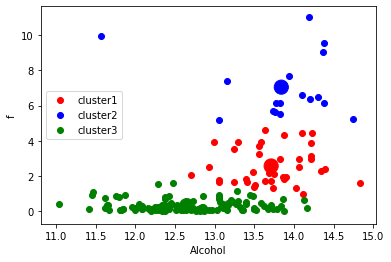

In [431]:
for i in range(n_iter): # n_iter 반복 횟수
    # 유클리드 거리가 최소가 되는 K 클러스터 할당
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((a-Centroids[:,k])**2,axis=1) 
        EuclidianDistance=np.c_[EuclidianDistance,tempDist] 
    C=np.argmin(EuclidianDistance,axis=1)+1 # shape=(22,)
    # K 클러스터 갱신
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0) 
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],a[i]]
    for k in range(K):
        Y[k+1]=Y[k+1].T # 전치행렬
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0) # K 클러스터 중심 갱신
    Output=Y
    # K-평균 클러스터링 결과 가시화
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']


for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=200,c=['red','blue','green'])

plt.xlabel('Alcohol')
plt.ylabel('f')
plt.legend()
plt.show()


In [401]:
 #와인 13항목의곱/13항목의평균곱